In [2]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, BasicAer
from qiskit.tools.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
import numpy as np
np.set_printoptions(precision=7, suppress=True)

## Classical and quantum registers

The classical registers hold measurement results. The quantum circuit takes gates that operate on the quantum registers. Once we define our algorithm in terms of gates and measurements, we need to execute the circuit. 

The execution can happen on the quantum processing unit or on a classical simulator. We will rely on the simulator, which is called `Aer` in qiskit.  This simulator has multiple backends, allowing us to do simulations with slightly different purposes

Let us define a single qbit and a corresponding classical register necessary for measurement purposes

In [3]:
q, c = QuantumRegister(1), ClassicalRegister(1)

## Backends

### `qasm_simulator`

The most straightforward simulator backend does exactly what we would expect: it runs a quantum algorithm and writes the measurement results to classical registers. After running a circuit a few times on the simulator, we can inspect the statistics of the results. This backend is called `qasm_simulator`:

In [4]:
backend = BasicAer.get_backend('qasm_simulator')

Let us build the simplest possible circuit that has no gates and only a measurement on a single qubit, writing out the result to a single classical register:

In [5]:
circuit = QuantumCircuit(q, c)
circuit.measure(q[0], c[0])

We execute this circuit on the simulator and observe the statistics:

In [7]:
job = execute(circuit, backend, shots=100)
result = job.result()
result.get_counts(circuit)

{'0': 100}

Remember that the qubit registers are always initialized as $|0\rangle$. 

Since the circuit is empty, out of a hundred executions we get 0 a hundred times. If you executed this on the quantum processor, you might get some 1s -- that would be due to noise.

If this was the only simulator backend, we would have a hard time debugging our quantum algorithms. Why? We would have to reconstruct the quantum state based on the measurements we make, which is not a trivial task in general. True, this is the only option we have on the actual hardware, but in a simulator, we have one more possibility: we could actually inspect the simulated quantum state (the wavefunction). Qiskit provides a backend for doing this called `statevector_simulator`.

### `statevector_simulator`

In [8]:
backend = BasicAer.get_backend('statevector_simulator')

In this case, we do not have to add measurements, unless the protocol we are implementing uses a measurement in its internal operation. So we can build a circuit without a measurement and inspect the quantum state directly. With this backend, an empty circuit needs at least an identity operation `iden`, otherwise a simulation would throw an error.  We demonstrate it here by adding a single Hadamard gate:

In [9]:
circuit = QuantumCircuit(q, c)
#circuit.iden(q[0])
circuit.h(q[0])
job = execute(circuit, backend)
state = job.result().get_statevector(circuit)
print(state)

[0.7071068+0.j 0.7071068+0.j]


confirming the expected result of $| \psi  \rangle = \dfrac{|0\rangle + |1\rangle}{\sqrt 2}$. 

This is especially important because the type of measurements we can perform are extremely restricted: technically speaking, we always measure in the computational basis. This means that, for instance, the states $|1\rangle$ and $-|1\rangle$ are indistinguishable based on the measurement statistics.

## Visualization

### Drawing the circuit

Circuit with a single qbit with a Hamamard gate followed by measurement to classical register

/Users/i335439/Desktop/QML/venv/lib/python3.6/site-packages/qiskit/tools/visualization/_circuit_visualization.py:206: DeprecationWarning: The current behavior for the default output will change in a future release. Instead of trying latex and falling back to mpl on failure it will just use "text" by default
  '"text" by default', DeprecationWarning)
WARNING Unable to compile latex. The output from the pdflatex command can be found in latex_error.log


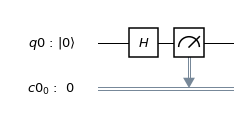

In [10]:
from qiskit.tools.visualization import circuit_drawer
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q[0], c[0])
circuit_drawer(circuit)

### Bloch sphere

Important to understand how rotations happen. Qiskit has a built-in function to plot a state on the Bloch sphere. This visualization method relies on the state vector simulator backend. For instance, let's compare the initial state $|0\rangle$ and the Hadamard gate applied to it:

Quantum state after Hadamard gate applied to |0>


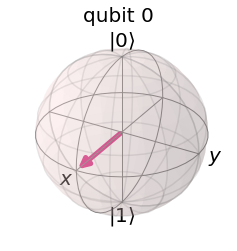

In [11]:
backend = BasicAer.get_backend('statevector_simulator')
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
job = execute(circuit, backend)
state = job.result().get_statevector(circuit)
print("Quantum state after Hadamard gate applied to |0>")
plot_bloch_multivector(state)

### Statistics of measurement results

This visualization needs the `qasm_simulator` backend.

In [12]:
backend = BasicAer.get_backend('qasm_simulator')

First, define an empty circuit and verify that the qbit stays on state $|0\rangle$

Statistics if we apply a Hadamard gate


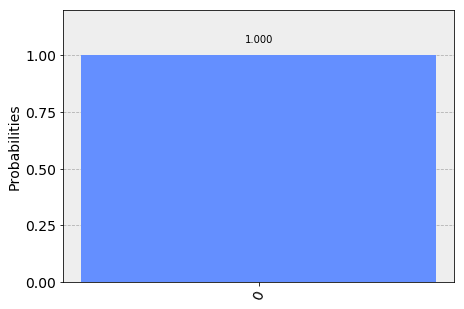

In [13]:
circuit = QuantumCircuit(q, c)
circuit.measure(q[0], c[0])
job = execute(circuit, backend, shots=1000)
print("Statistics if we apply a Hadamard gate")
plot_histogram(job.result().get_counts(circuit))

As we can see, the 'perfect' nature of the simulator is reflected again in getting all 0s for the initial state, and a distribution very close to uniform after applying the Hadamard gate. In a longer circuit on real quantum hardware, these statistics would be heavily affected by noise.

Next, look at statistics after Hadamard gate

Statistics if we apply a Hadamard gate


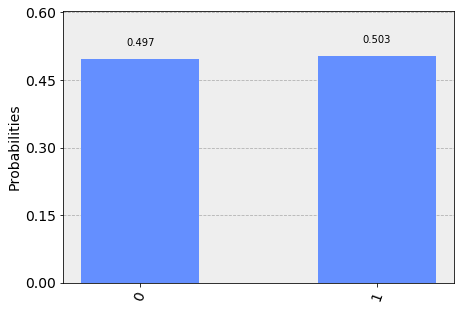

In [14]:
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q[0], c[0])
job = execute(circuit, backend, shots=1000)
print("Statistics if we apply a Hadamard gate")
plot_histogram(job.result().get_counts(circuit))